In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Voter Registration Data
Downloaded from https://www.sos.la.gov/ElectionsAndVoting/Pages/RegistrationStatisticsParish.aspx

The columns are in this order:

--REGISTERED VOTERS--       --DEMOCRATS--               --REPUBLICANS--             --OTHER PARTIES--

TOTAL  WHITE  BLACK  OTHER  TOTAL  WHITE  BLACK  OTHER  TOTAL  WHITE  BLACK  OTHER  TOTAL  WHITE  BLACK  OTHER

In [2]:
def count_voters(precincts, df, column):
    voter_count = []
    for p in precincts:
        # PARISH 36 - WARD 8 - PRECINCT #
        if type(p[1]) == int:
            precinct_name = "PAR 36 W {:02d} P {:02d}".format(p[0], p[1])
        elif type(p[1]) == str:
            precinct_name = "PAR 36 W {:02d} P {}".format(p[0], p[1])
        precinct_row = df[ df['precinct-name'].str.match(precinct_name)]
        row_index = precinct_row.index.values.astype(int)[0]
        row_total = df.at[row_index, column]
        if type(row_total) == str and ',' in row_total:
            row_total = row_total.replace(',', '')
        # try:
        # except AttributeError as e:
        #     print(p)
        #     print(row_index, column)
        #     print(precinct_row)
        #     raise e

        row_total = int(row_total)
        voter_count.append( row_total )
    return sum(voter_count)

In [3]:
df = pd.read_excel(
    # "2020_0601_par_comb.xls",
    "2021_0201_par_comb.xls",
    sheet_name="Sheet36",
    skiprows=116
)
df.columns = [
    "precinct-name",
    "empty-space",
    "registered-total",
    "registered-white",
    "registered-black",
    "registered-other",
    "dem-total",
    "dem-white",
    "dem-black",
    "dem-other",
    "rep-total",
    "rep-white",
    "rep-black",
    "rep-other",
    "other-total",
    "other-white",
    "other-black",
    "other-other"
]

# These were manually selected from the included District C precinct map
eastbank_precincts = [
    # WARD, PRECINCT
    (4, 2),
    (5, 1), (5, 2), (5, 3),
    (6, 1), (6, 2), (6, 4),
    (7, 1), (7, 2), (7, 4), (7, 5), (7, 6),
    (8, 1), (8, 2), (8, 4), (8, 6),
    (9, 9), (9, 11), (9, 12), (9, 13), (9, 14), (9, 15), (9, 16), (9, 19),
]

westbank_precincts = [
    # WARD, PRECINCT
    (15, 1), (15, 2), (15, 3), (15, 5), (15, 6), (15, 8), (15, 9), (15, 10), (15, 11), (15, 12), (15, '12A'),
    (15, 13), (15, '13A'), (15, '13B'),
    (15, 14), (15, '14A'), (15, '14B'), (15, '14C'), (15, '14D'), (15, '14E'), (15, '14F'), (15, '14G'),
    (15, 15), (15, '15A'), (15, '15B'),
    (15, 16),
    (15, 17), (15, '17A'), (15, '17B'),
    (15, 18), (15, '18A'), (15, '18B'), (15, '18C'), (15, '18D'), (15, '18E'), (15, '18F'),
    (15, 19), (15, '19A'), (15, '19B'), (15, '19C'),
]

total_voter_count = count_voters(eastbank_precincts + westbank_precincts, df, 'registered-total')
total_black = count_voters(eastbank_precincts + westbank_precincts, df, 'registered-black')
total_white = count_voters(eastbank_precincts + westbank_precincts, df, 'registered-white')
total_other_race = count_voters(eastbank_precincts + westbank_precincts, df, 'registered-other')
total_dem = count_voters(eastbank_precincts + westbank_precincts, df, 'dem-total')
total_rep = count_voters(eastbank_precincts + westbank_precincts, df, 'rep-total')
total_other_party = count_voters(eastbank_precincts + westbank_precincts, df, 'other-total')

eastbank_total_voter_count = count_voters(eastbank_precincts, df, 'registered-total')
westbank_total_voter_count = count_voters(westbank_precincts, df, 'registered-total')
eastbank_black_voter_count = count_voters(eastbank_precincts, df, 'registered-black')
westbank_black_voter_count = count_voters(westbank_precincts, df, 'registered-black')
eastbank_white_voter_count = count_voters(eastbank_precincts, df, 'registered-white')
westbank_white_voter_count = count_voters(westbank_precincts, df, 'registered-white')
eastbank_other_voter_count = count_voters(eastbank_precincts, df, 'registered-other')
westbank_other_voter_count = count_voters(westbank_precincts, df, 'registered-other')

eastbank_dem_voter_count = count_voters(eastbank_precincts, df, 'dem-total')
westbank_dem_voter_count = count_voters(westbank_precincts, df, 'dem-total')
eastbank_rep_voter_count = count_voters(eastbank_precincts, df, 'rep-total')
westbank_rep_voter_count = count_voters(westbank_precincts, df, 'rep-total')

WARNING *** file size (3227584) not 512 + multiple of sector size (512)


In [4]:
# Print tabular data
# Percentages are of the total line; each line's percentages add to 100%

print("District C Voter Totals")
print("{:20}{:17}{:17}".format("Black", "White", "Other"))
print("{:>8d} ({:5.1%}) {:>8d} ({:5.1%}) {:>8d} ({:5.1%})".format(total_black, total_black/total_voter_count, total_white, total_white/total_voter_count, total_other_race, total_other_race/total_voter_count))
print("")
print("{:20}{:17}".format("Democratic", "Republican"))
print("{:>8d} ({:5.1%}) {:>8d} ({:5.1%}) {:>8d} ({:5.1%})".format(total_dem, total_dem/total_voter_count, total_rep, total_rep/total_voter_count, total_other_party, total_other_party/total_voter_count))
print("")
print("District C East Bank vs West Bank")
print("{:20s}{:17s}{:17s}".format("", "East Bank", "West Bank"))
print("{:17s}{:>8d} ({:5.1%}) {:>8d} ({:5.1%})".format("Total voters", eastbank_total_voter_count, eastbank_total_voter_count/total_voter_count, westbank_total_voter_count, westbank_total_voter_count/total_voter_count,))
print("{:17s}{:>8d} ({:5.1%}) {:>8d} ({:5.1%})".format("Black voters", eastbank_black_voter_count, eastbank_black_voter_count/total_black, westbank_black_voter_count, westbank_black_voter_count/total_black))
print("{:17s}{:>8d} ({:5.1%}) {:>8d} ({:5.1%})".format("White voters", eastbank_white_voter_count, eastbank_white_voter_count/total_white, westbank_white_voter_count, westbank_white_voter_count/total_white))
print("{:17s}{:>8d} ({:5.1%}) {:>8d} ({:5.1%})".format("Other race voters", eastbank_other_voter_count, eastbank_other_voter_count/total_other_race, westbank_other_voter_count, westbank_other_voter_count/total_other_race))
print("{:17s}{:>8d} ({:5.1%}) {:>8d} ({:5.1%})".format("Democratic voters", eastbank_dem_voter_count, eastbank_dem_voter_count/total_dem, westbank_dem_voter_count, westbank_dem_voter_count/total_dem))
print("{:17s}{:>8d} ({:5.1%}) {:>8d} ({:5.1%})".format("Republican voters", eastbank_rep_voter_count, eastbank_rep_voter_count/total_rep, westbank_rep_voter_count, westbank_rep_voter_count/total_rep))

District C Voter Totals
Black               White            Other            
   27394 (54.7%)    17924 (35.8%)     4769 ( 9.5%)

Democratic          Republican       
   32028 (63.9%)     4807 ( 9.6%)    13252 (26.5%)

District C East Bank vs West Bank
                    East Bank        West Bank        
Total voters        15602 (31.1%)    34485 (68.9%)
Black voters         4638 (16.9%)    22756 (83.1%)
White voters         9278 (51.8%)     8646 (48.2%)
Other race voters    1686 (35.4%)     3083 (64.6%)
Democratic voters    9745 (30.4%)    22283 (69.6%)
Republican voters    1147 (23.9%)     3660 (76.1%)


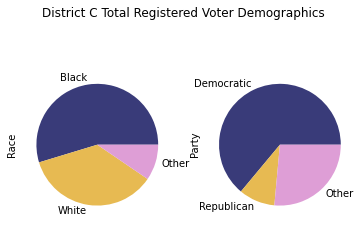

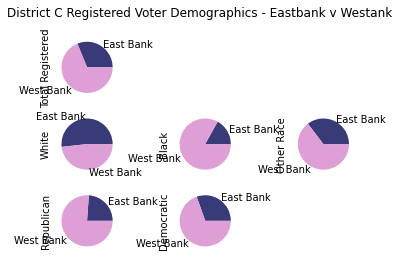

In [5]:
# Create and show to charts

# Show total first

total_race = pd.DataFrame(
    {
        "Race": [total_black, total_white, total_other_race],
    },
    index=['Black', 'White', 'Other']
)

total_party = pd.DataFrame(
    {
        "Party": [total_dem, total_rep, total_other_party],
    },
    index=['Democratic', 'Republican', 'Other']
)

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.suptitle('District C Total Registered Voter Demographics') 

# fig.set_figheight(6)
# fig.set_figwidth(8)

total_race["Race"].plot.pie(ax=axes[0], colormap="tab20b")
total_party["Party"].plot.pie(ax=axes[1], colormap="tab20b")

# East Bank vs West Bank

eb_wb = pd.DataFrame(
    {
        "Total Registered": [eastbank_total_voter_count, westbank_total_voter_count],
        "White": [eastbank_white_voter_count, westbank_white_voter_count],
        "Black": [eastbank_black_voter_count, westbank_black_voter_count],
        "Other Race": [eastbank_other_voter_count, westbank_other_voter_count],
        "Democratic": [eastbank_dem_voter_count, westbank_dem_voter_count],
        "Republican": [eastbank_rep_voter_count, westbank_rep_voter_count]
    },
    index=['East Bank', 'West Bank']
)

fig, axes = plt.subplots(nrows=3, ncols=3)
fig.suptitle('District C Registered Voter Demographics - Eastbank v Westank') 

# fig.set_figheight(6)
# fig.set_figwidth(8)

eb_wb["Total Registered"].plot.pie(ax=axes[0, 0], colormap="tab20b")
axes[0, 1].axis('off')
axes[0, 2].axis('off')

eb_wb["White"].plot.pie(ax=axes[1, 0], colormap="tab20b")
eb_wb["Black"].plot.pie(ax=axes[1, 1], colormap="tab20b")
eb_wb["Other Race"].plot.pie(ax=axes[1, 2], colormap="tab20b")

eb_wb["Republican"].plot.pie(ax=axes[2, 0], colormap="tab20b")
eb_wb["Democratic"].plot.pie(ax=axes[2, 1], colormap="tab20b")
axes[2, 2].axis('off')

# fig.tight_layout()
# plot = eb_wb.plot.pie(subplots=True, colormap="tab20b")

###
plt.show()